# Group Meeting 4

Information Dynamics, Active Information Storage, Transfer Entropy

### Readings 

N/A

## Information Dynamics

What does it mean to say that a complex systems "computes" or "performs computation?" I like Melanie Mitchell's definition: "computation is dynamics with purpose". We say that a system is "computing" if it's next state is a function of some combination of it's own past state and/or the past-states of some set of inputs. 

If "computation" is a system determining it's own next state as a function of it's past states (or the past states of it's environment), then (given a good model), we should be able to reduce our uncertainty about the future if we know about the past. In some respects, this is the core of science. 

### Conditional Entropy Rate

For a discrete random variable $X$ (which can be univariate or multivariate) The conditional entropy rate tells us the extent to which knowing about a systems past reduces our uncertainty about what state it will adopt (assuming states are drawn from a finite, discrete state-space). 

\begin{equation}
H_{\mu}(X) = \lim_{k \to \infty}H(X_{t} | X_{t-1}, X_{t-2} ... X_{t-k})
\end{equation}

If we don't happen to have an infinitely long recording available (and infinite computer power to process it with), we can define the finite conditional entropy rate of order $k$ as:

\begin{equation}
H_{\mu}^{-k}(X) = H(X_{t} | X_{t-1}, X_{t-2} ... X_{t-k})
\end{equation}

Experts in dynamical systems should recognize this as something rather like an Taken's embedding used to reconstruct a high-dimensional attractor from a low-dimensional signal. 

$H_{\mu}(X)$ gives us something like a measure of $X$'s *intrinsic unpredictability*. If $X$ has a long "memory", then knowledge of the past can reduce our uncertainty about the future. 

### Information Storage

The "flip side" of conditional entropy rate is information storage. The conditional entropy rate tells us how much *intrinsic uncertainty* is inherrent in $X$. If we want to know much much information about the past tells us about the future, we can use the active information storage. 

For a system $X$, active information storage ($AIS(X)$) defined as the mutual information between the *past* of the system (going back $k$-timesteps) and the immediate next state:

\begin{equation}
AIS(X) = \lim_{k \to \infty} MI(X_{t} ; X_{t-1}^{-k})
\end{equation}

As usual, rather than trying to calculate infinitely large joint-probability spaces, we'll restrict ourselves to $AIS(X)$ of order $k$. Recall that we can decompose the mutual information into a sum of marginal entropies:

\begin{eqnarray}
AIS^{-k}(X) = &=& H(X_{t}, X_{t-1}^{-k}) - [H(X_{t} | X_{t-1}^{-k}) + H(X_{t-1}^{-k} | X_{t})] \\
&=& H(X_{t},X_{t-1}^{-k}) - H_{\mu}^{-k}(X) - [H(X_{t},X_{t-1}^{-k}) - H(X_{t})] \\
&=&H(X_{t}) - H_{\mu}^{-k}(X)
\end{eqnarray}

This derivation shows us that the active information storage is the difference between our overall uncertainty about the next state of $X$ and that uncertainty which could never be reduced by knowing the past (i.e. the amount of information the past provides about the future).

### Predictive Information 

Active information storage tells us how much information from the past goes into computing the immediate next state of $X$. What if we want to know about *all* the information from the past that will be used *at some point* in the semi-infinite future? For that we can use the predictive information, which quantifies the total amount of statistical structure that the system exhibits throughout all time. 

\begin{equation}
E(X) = \lim_{k \to \infty}MI(X_{t}^{+k} ; X_{t-1}^{-k})
\end{equation}

Again, for finite values of $k$, we denote the finite predictive information as $E^k(X)$. 

If $X$ is Markovian (i.e. the next state depends only the immediately preceeding one), then:

\begin{equation}
E(X) = MI(X_{t} ; X_{t+1})
\end{equation}

### Information Transfer

In addition to knowing how information is stored in a single variable, we might also be interested in how information is transfered from a source $X$ at time $t$, to a target $Y$ at time $t+1$. The simplest possibility is to look at the mutual information between between the past of $X$ and the immediate future of $Y$:

\begin{equation}
MI(X_{t-1}^{-k} ; Y_t)
\end{equation}

This gives us a measure of how much information about the past of $X$ gives us about $Y$'s next state. The problem with this simplistic measure, however, is that it conflates information being transfered from $X$ to $Y$, with information that is actively stored in $Y$ and $X$ seperately. Consider the case of two uncoupled variables that osscilate with $\sin(t)$ and $\cos(t)$ respectively:

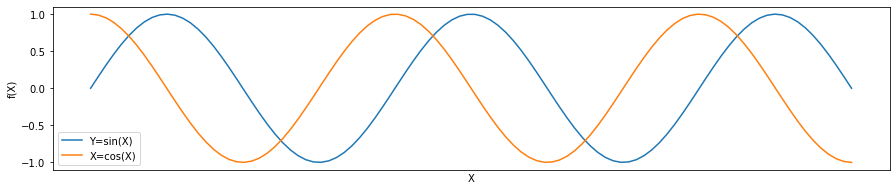

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

sin = np.sin(np.linspace(0, np.pi*5, 100))
cos = np.cos(np.linspace(0, np.pi*5, 100))

plt.figure(figsize=(15,3))
plt.plot(sin, label="Y=sin(X)")
plt.plot(cos, label="X=cos(X)")
plt.xticks([])
plt.xlabel("X")
plt.ylabel("f(X)")
plt.legend()

Because $X$ is always "lags" $Y$ by some multiple of $\pi$ and they are identical curves, the mutual information between the two is quite high. Knowing the past of $X$ gives you a lot of insight into what $Y$ is going to do in the future:

\begin{equation}
MI(X_{t-1}^{-k} ; Y_t) > 0
\end{equation}

The problem, of course is that knowing $Y$'s past by itself *also* gives you signficant insights into it's own future. In fact, knowing $Y$'s past is as informative about $Y$'s future as $X$'s past is. Formally:

\begin{equation}
MI(X_{t-1}^{-k} ; Y_t | Y_{t-1}^{-k}) = 0
\end{equation}

In truth, $X$ and $Y$ are totally independent. What we want, then, is a measure that tells us *how much better are we at predicting Y's future when we know the past of X than we would be if we just knew the past of Y?*. 

In the sine/cosine case, it's clear that this value would be low. All you need is $Y$'s own past, $X$ provides nothing *above and beyond* what Y does. This brings us to *Transfer Entropy*

#### Transfer Entropy

The transfer entropy is given by a conditional mutual information: the time-lagged MI between $X$'s past and $Y$'s future, *conditioned* on $Y$'s past.

\begin{equation}
TE(X \rightarrow Y) = MI(X_{t-1}^{-l} ; Y_t | Y_{t-1}^{-k})
\end{equation}

Transfer entropy is *high* when the past of $X$ is very informative about the future state of $Y$, but $Y$'s own past is minimally informative. 

Consider the case where $X$ is a random number generator and $Y$ always copies $X$ at the time-step. Knowing the past of $X$ gives you total certainty about the future of $Y$, however, $Y$'s own past is minimally informative, since it just copies $X$ at time $t-1$ without paying any attention to it's own previous state.

#### Computing Transfer Entropy

When computing the transfer entropy between two variables, it is vitally important to have a valid null model against which to compare the empirical value. 
The general algorithm for pairwise TE is:

1) Select optimal value of $k$ to construct the embedded $Y_{t-1}^{-k}$. This can be thought of as optimizing the active information storage so that we get *as much predictive power from $Y$'s own past as possible*. Keep in mind that we are trying to balance the history taken into account with the amount of available data. 

2) Select optimal value of $l$ to construct the embedded $X_{t-1}^{-l}$. This can be thought of as optimizing *the amount of predictive power from $X$'s past about $Y$'s future*. Keep in mind that we are trying to balance the history taken into account with the amount of available data.

3) Calculate the empirical $TE(X \rightarrow Y)$

4) You now need to create a null distribution against which you can significance-test your empirical TE value. This usually entails randomizing the *source* time-series (so as to preserve the autocorrelation of the reciever). There are a lot of considerations about how best to do this - I generally recommend "rolling" the source-time-series (offsetting every time-point by a fixed $n$), which preserves the autocorrelation of the source series while (in theory) breaking any association between source and target. 

5) Calculate the null TE, and do this 1000+ times to build up a distribution of possible null values (remember to randomize the source-time-series every time!).

6) If your empirical TE is greater than some pre-determined percentage of the null TEs, you conclude statistical significance and your empirical TE is "real."


### Information Modification

Of the three major components of information dynamics, this is the one that has had the most difficulty being successfully formalized. Information storage is quantified using AIS, and information transfer is quantified using TE. Information modification, however, has resisted attempts to move beyond heuristics. One promising, graph-based approach is to consider the case when multiple inputs feed into a single element, which produces some kind of output based on the joint-states of all inputs. 

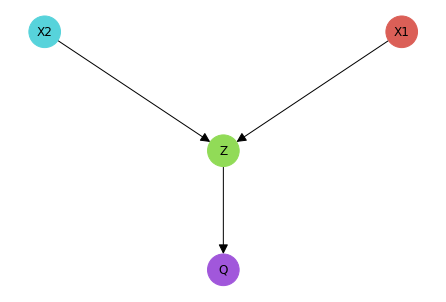

In [97]:
import seaborn as sns
G = nx.DiGraph([("X1","Z"),("X2","Z"),("Z","Q")])
nx.draw_kamada_kawai(G,
                     with_labels=True, 
                     node_color=sns.palettes.hls_palette(4),
                     node_size=10**3,
                     arrowsize=20
                    )

Presumably $Z$ is performing some kind of *computation* on the states of $X_1$ and $X_2$. In the simplest case, $Z$ might just ignore either $X_1$ or $X_2$ and simply serve as a relay, in which case information is not modified, but rather, just transfered. 

\begin{equation}
Z(X_1, X_2) = COPY(X_1)
\end{equation}

Alternately, $Z$ may implement some kind of Boolean function (assuming all elements are binary), which is sensitive to the joint states of both parents. Consdier the logical exclusive-OR function, which has a truth table:

$(0, 0) \to 0$

$(0, 1) \to 1$ 

$(1, 0) \to 1$

$(1, 1) \to 0$

The XOR gate is a *synergistic* function: know the value of only one input gives you absolutely no information about what the output will be. Contrast this with something like the logical OR function: if I tell you that one input is 0, then you can already reduce your uncertainty by betting that the output will be 1 (since two inputs with a 0 lead ot a 1, while only one input with a 0 leads to 0). If:

\begin{equation}
Z(X_1, X_2) = XOR(X_1, X_2)
\end{equation}

Then the output of Z is irreducable to the upstream states of $X_1$ and $X_2$. 

\begin{equation}
MI(X_1 ; Z) = 0, MI(X_2 ; Z) = 0, MI(X_1, X_2 ; Z) = 1
\end{equation}

Quantifying "how much" information has been modified, or finding a way to relate it to something like transfer entropy (the way we related $AIS$ to $H_{\mu}$ turns out to be much harder, and requires building some mathematics we haven't seen yet. 

## Practical Considerations 

Theory is all well and good, but what if you want to set parameters to explore finite-sized datsets?

Text(0.5, 1.0, 'Sample BOLD Time-Series')

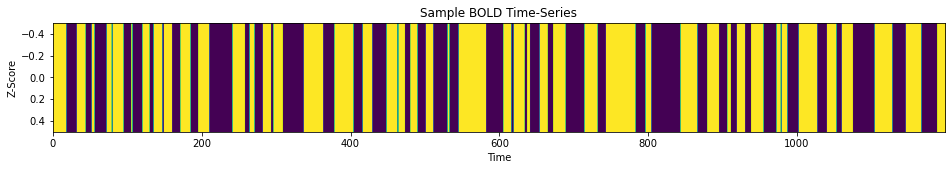

In [12]:
import numpy as np 
from scipy.stats import entropy
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.stats import zscore
from collections import Counter
import networkx as nx

data = np.load("data/HCP_BOLD.npz")
bold = zscore(data["signal"], axis=1) #Z-scored for data-hygiene reasons.
bold[bold < 0] = int(0)
bold[bold > 0] = int(1)

bold=bold.astype("int")
bold_0 = bold[0,:].reshape((1,1200))

plt.figure(figsize=(16,2))
plt.imshow(bold_0[:,:], aspect="auto")
plt.xlabel("Time")
plt.ylabel("Z-Score")
plt.title("Sample BOLD Time-Series")

We want to know how the value of $k$ changes AIS. It's easiest to start with $k=1$, this corresponds to just duplicated the time-series with an offset of 1. 

In [13]:
#When K=1
pres = bold[0][1:]
past = bold[0][:-1]

H_pres = entropy(list(Counter(pres).values()), base=2)
H_past = entropy(list(Counter(past).values()), base=2)
H_joint = entropy(list(Counter(zip(pres, past)).values()), base=2)

print("MI, k=1:", round(H_pres+(H_past-H_joint), 4), "bit")

MI, k=1: 0.6191 bit


This is pretty good. If the past provided no insight into the next state, then the AIS would be 0 bit. If our signal were maximally entropic and totally deterministic, AIS would be 1 bit. So, we're doing pretty well. 

We want to sweep a bunch of $k$, so let's make a function that will do that for us. 

In [4]:
def ais(X, k=3, unique=False):
    pres = X[k:]
    past = ["".join((str(i) for i in bold[0][j:j+k])) for j in range(bold[0].shape[0]-k)]
    unique_past = {x for x in past}
    
    
    H_pres = entropy(list(Counter(pres).values()), base=2)
    H_past = entropy(list(Counter(past).values()), base=2)
    H_joint = entropy(list(Counter(zip(pres, past)).values()), base=2)
    
    if unique == False:
        return H_pres+H_past-H_joint
    elif unique == True:
        return H_pres+H_past-H_joint, unique_past

We can then iterate through $k$ and watch how AIS grows (it will only ever grow as no information about the past will make it harder to predict the future). 

Text(0, 0.5, 'Bit')

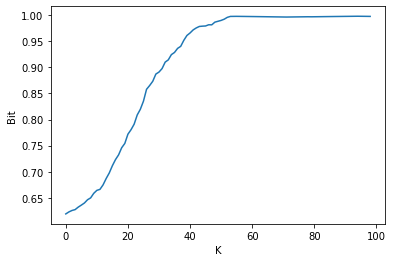

In [5]:
ais_range = [ais(bold[0],k) for k in range(1,100)]
plt.plot(ais_range)
plt.xlabel("K")
plt.ylabel("Bit")

I went to 100 to illustrate the point that AIS will saturate given enough time. However, that doesn't mean that we should always crank $k$ up as high as it can possibly go. Consider what it means to have a history of $k=100$. That means that there are $2^{100}$ possible pasts and we a little less than $2^{10}$ observations of our system. Consequently, we are only sampling $8\times10^{-26}\%$ of our possible state-space. 

Consequently, every past state/future state combination only appears once, giving the illusion of total predictive power but it's only because your state-space is so undersampled. There are no instances of the same past state leading to different future states - everything appears to be deterministic. 

We can ask when the system becomes so undersampled as to be useless. Below we plot AIS for the same time-series, with $k$ running from 1 to 20, and we will plot the proportion of the possible state-space explored.  

In [77]:
ais_range_2 = [ais(bold[0],k, True) for k in range(1,20)]
ais_val, unique_sets = zip(*ais_range_2)
powers_2 = [2**x for x in range(1,20)]

sample_space = [len(unique_sets[i]) / powers_2[i] for i in range(len(powers_2))]

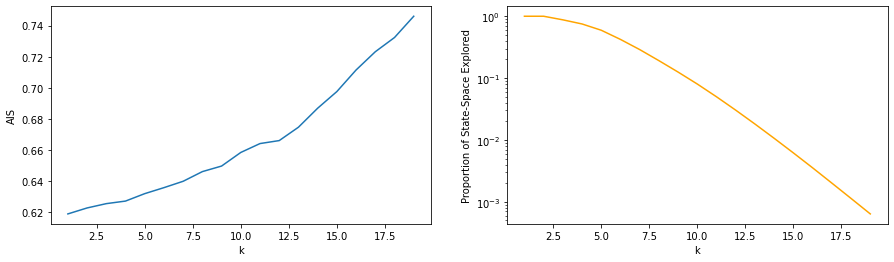

In [92]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(np.arange(1,len(ais_val)+1),ais_val)
plt.xlabel("k")
plt.ylabel("AIS")

plt.subplot(1,2,2)
plt.plot(np.arange(1,len(ais_val)+1),sample_space, color="orange")
plt.xlabel("k")
plt.ylabel("Proportion of State-Space Explored")
plt.yscale("log")

So, what $k$ should you pick? There isn't always a *best* choice - you need to ensure that you pick a large enough $k$ that you don't underestimate the AIS (that is to say, you miss out on some information). On the flip side, you can't pick too large a space that the sample-space is unresolvable (in which case, you will over-estimate AIS because the system will appear deterministic). 